In [1]:
import os
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pprint import pprint

# rsync -avz sx:/16t-2/cl/project/qlib/vis_result/plots/ /Users/chenglong/Documents/plots
# Constants for file names and model paths

PERFORMANCE_FILE = 'port_analysis_1day.pkl'
REPORT_FILE = 'report_normal_1day.pkl'
DIR_AFTERFIX = 'portfolio_analysis'

# Result directoriesa
RESULT_PATH = '/16t-2/cl/project/qlib/examples/us_day_res'

RR_PATH = '/home/cl/project/qlib/examples/rr_result_collected'
DDGDA_PATH = '/home/cl/project/qlib/examples/ddgda_result_collected'

TRAINING_TYPES = ['ST', 'RR', 'DDGDA']
MODEL_LIST = ['LightGBM', 'Transformer', 'Linear', 'LSTM', 'XGBoost', 'MLP']

In [2]:
# scan done models
perf_dict = {}
for tt in TRAINING_TYPES:
    tmp_dict = {}
    for md in MODEL_LIST:
        try:
            file_path = os.path.join(RESULT_PATH, tt, md, REPORT_FILE)
            perf_res = pd.read_pickle(file_path).iloc[1:]
            value_res = perf_res['account']
            tmp_dict[md] = value_res
        except:
            print(f'Training Type {tt}, model: {md} is missed')
            continue
    perf_dict[tt] = tmp_dict

In [3]:
file_path = os.path.join(RESULT_PATH, tt, md, REPORT_FILE)
perf_res = pd.read_pickle(file_path)
bench_line = perf_res['bench'].cumsum() + 1

In [4]:
tt = 'DDGDA'
md = 'LSTM'
file_path = os.path.join(RESULT_PATH, tt, md, REPORT_FILE)
perf_res = pd.read_pickle(file_path)
# bench_line = perf_res['bench'].cumsum() + 1

In [5]:
perf_res['year_ret'] = 0
for idx in range(len(perf_res)):
    try:
        perf_res.iloc[idx, 9] = (perf_res.iloc[idx + 240, 0] - perf_res.iloc[idx, 0]) / 100000000.0
    except:
        perf_res.iloc[idx, 9] = (perf_res.iloc[-1, 0] - perf_res.iloc[idx, 0]) / 100000000.0

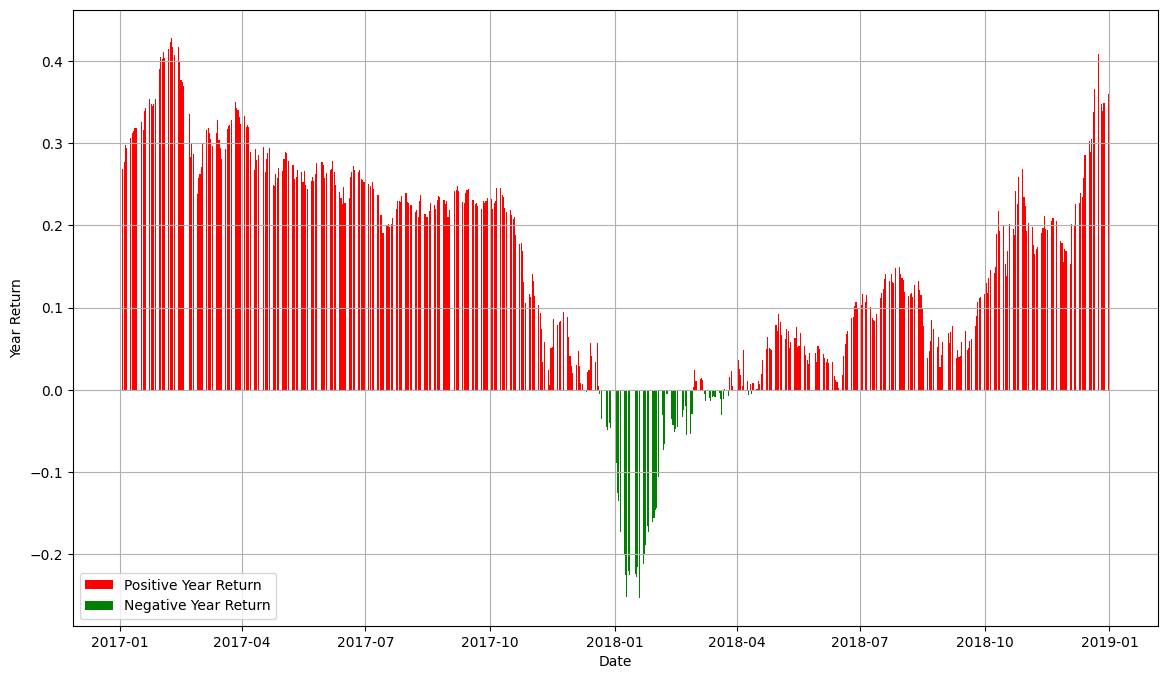

In [6]:
plt.figure(figsize=(14, 8))

# for model, data in perf_dict['DDGDA'].items():
data = perf_res['year_ret']
data = data.loc[:'2019-01-01']
bigger_than_zero = data[lambda x:x>0]
smaller_than_zero = data[lambda x:x<=0]
plt.bar(bigger_than_zero.index, bigger_than_zero.values, color='r', label='Positive Year Return')
plt.bar(smaller_than_zero.index, smaller_than_zero.values, color='g', label='Negative Year Return')
# plt.bar(data.index, data.values, label='Year Return')

# plt.plot(bench_line.index, bench_line.values, label='SP500')

plt.xlabel('Date')
plt.ylabel('Year Return')
# plt.title(graph_name)
# plt.title(f'Year Return of Each Day\nTraining Type: {tt}')
plt.savefig('./plots/Year_return.png')
plt.legend()
plt.grid(True)

In [8]:
data.mean()

0.15035811092339824

In [9]:
data.std()

0.13719769311874264

In [10]:
len(data[lambda x:x>=0]) / len(data)

0.8804780876494024

In [13]:
(perf_res.iloc[240, 0] - perf_res.iloc[0, 0]) / 100000000.0

0.1960590909454806

In [12]:
bench_line

datetime
2017-01-03    1.008487
2017-01-04    1.014209
2017-01-05    1.013438
2017-01-06    1.016955
2017-01-09    1.013406
                ...   
2019-12-24    1.389097
2019-12-26    1.394225
2019-12-27    1.394259
2019-12-30    1.388479
2019-12-31    1.391425
Name: bench, Length: 754, dtype: float64

<Axes: xlabel='datetime'>

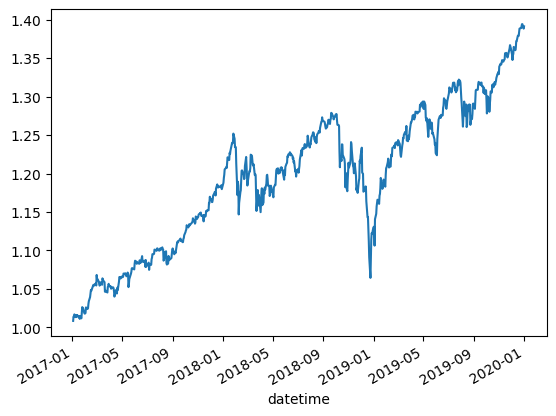

In [16]:
bench_line.plot()

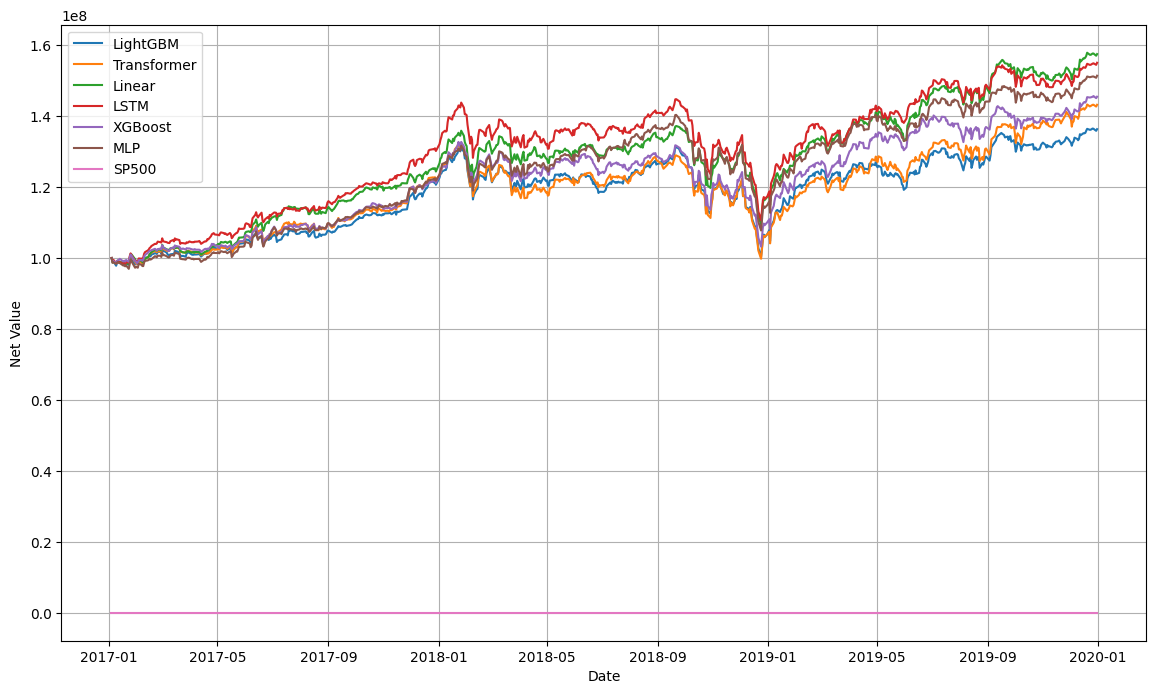

In [14]:
plt.figure(figsize=(14, 8))

for model, data in perf_dict['DDGDA'].items():
    plt.plot(data.index, data.values, label=model)

plt.plot(bench_line.index, bench_line.values, label='SP500')

plt.xlabel('Date')
plt.ylabel('Net Value')
# plt.title(graph_name)
# plt.title(f'Net Values Over Time for Different Models\nTraining Type: {tt}')

plt.legend()
plt.grid(True)

In [3]:
perf_dict['DDGDA']

{'LightGBM': datetime
 2017-01-04    9.995250e+07
 2017-01-05    9.902009e+07
 2017-01-06    9.906842e+07
 2017-01-09    9.779002e+07
 2017-01-10    9.854422e+07
                   ...     
 2019-12-24    1.361179e+08
 2019-12-26    1.364533e+08
 2019-12-27    1.363856e+08
 2019-12-30    1.358047e+08
 2019-12-31    1.362765e+08
 Name: account, Length: 753, dtype: float64,
 'Transformer': datetime
 2017-01-04    9.995250e+07
 2017-01-05    9.909164e+07
 2017-01-06    9.914479e+07
 2017-01-09    9.844210e+07
 2017-01-10    9.878588e+07
                   ...     
 2019-12-24    1.428153e+08
 2019-12-26    1.431305e+08
 2019-12-27    1.431614e+08
 2019-12-30    1.426450e+08
 2019-12-31    1.431481e+08
 Name: account, Length: 753, dtype: float64,
 'Linear': datetime
 2017-01-04    9.995345e+07
 2017-01-05    9.868000e+07
 2017-01-06    9.901048e+07
 2017-01-09    9.859002e+07
 2017-01-10    9.908096e+07
                   ...     
 2019-12-24    1.572205e+08
 2019-12-26    1.575963e+08
 20

In [3]:
model_dict = {}
for md in MODEL_LIST:
    md_dict = {}
    for tt in TRAINING_TYPES:
        md_dict[tt] = perf_dict[tt][md]
    model_dict[md] = md_dict

In [4]:
def plt_models(data_dict, graph_name, save_name, show = True):
# 绘图

    plt.figure(figsize=(14, 8))

    for model, data in data_dict.items():
        plt.plot(data.index, data.values, label=model)

    plt.xlabel('Date')
    plt.ylabel('Net Value')
    # plt.title(graph_name)
    # plt.title(f'Net Values Over Time for Different Models\nTraining Type: {tt}')

    plt.legend()
    plt.grid(True)

    plt.savefig(save_name)
    if(show):
        plt.show()

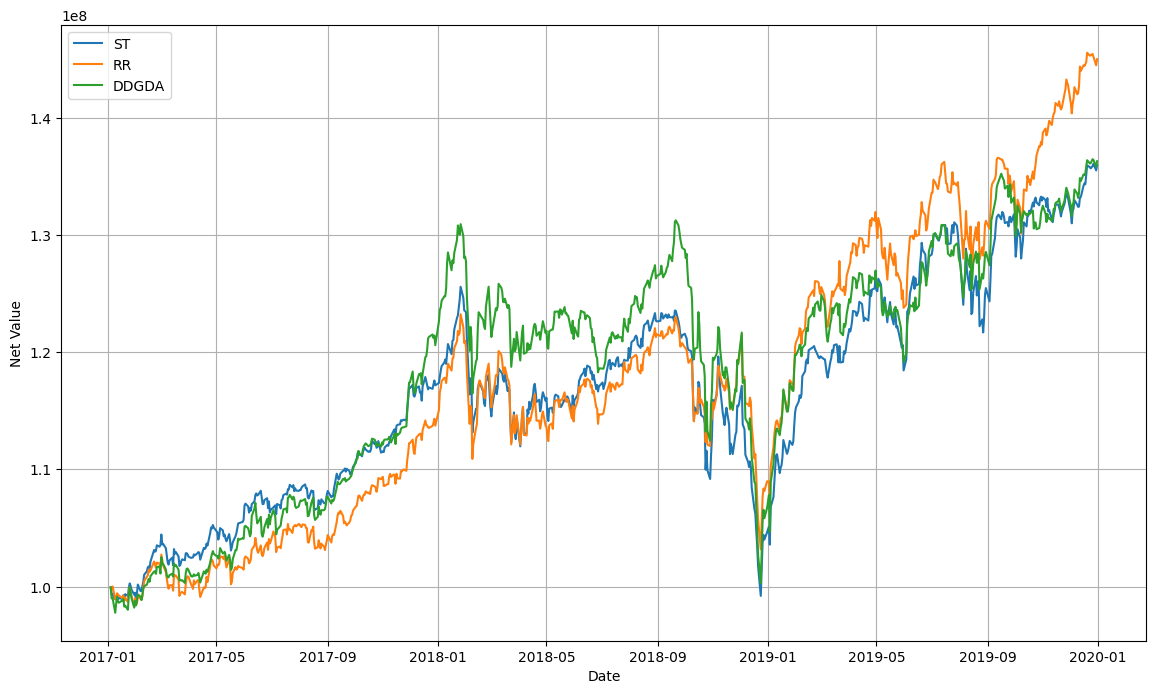

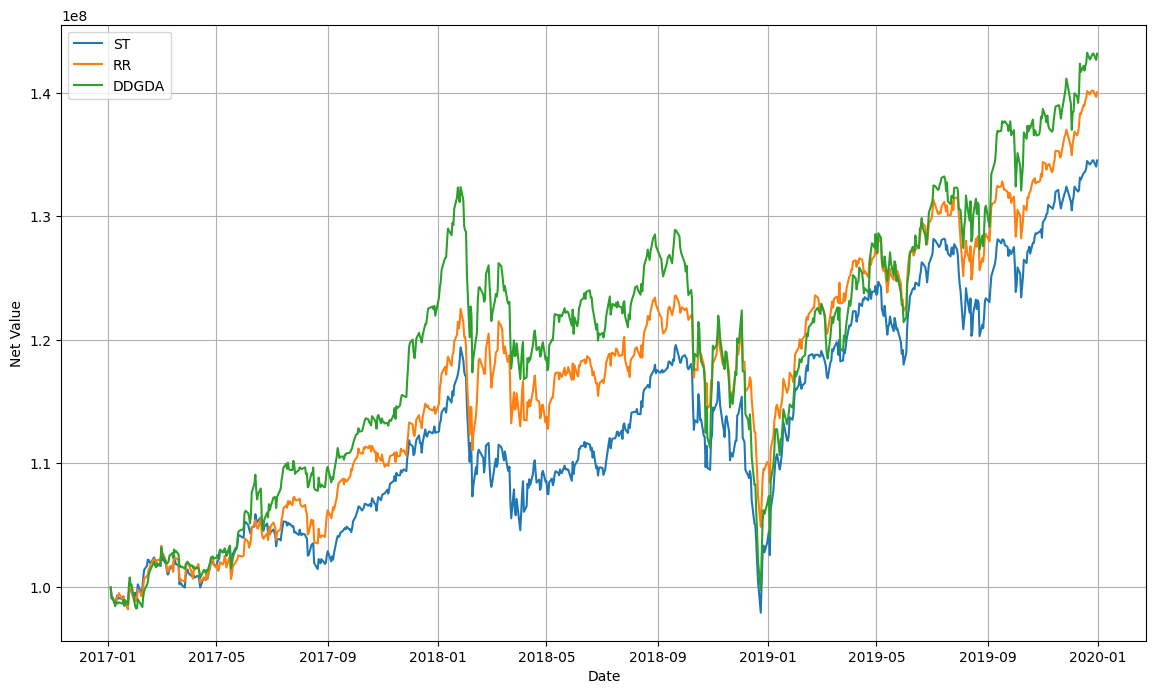

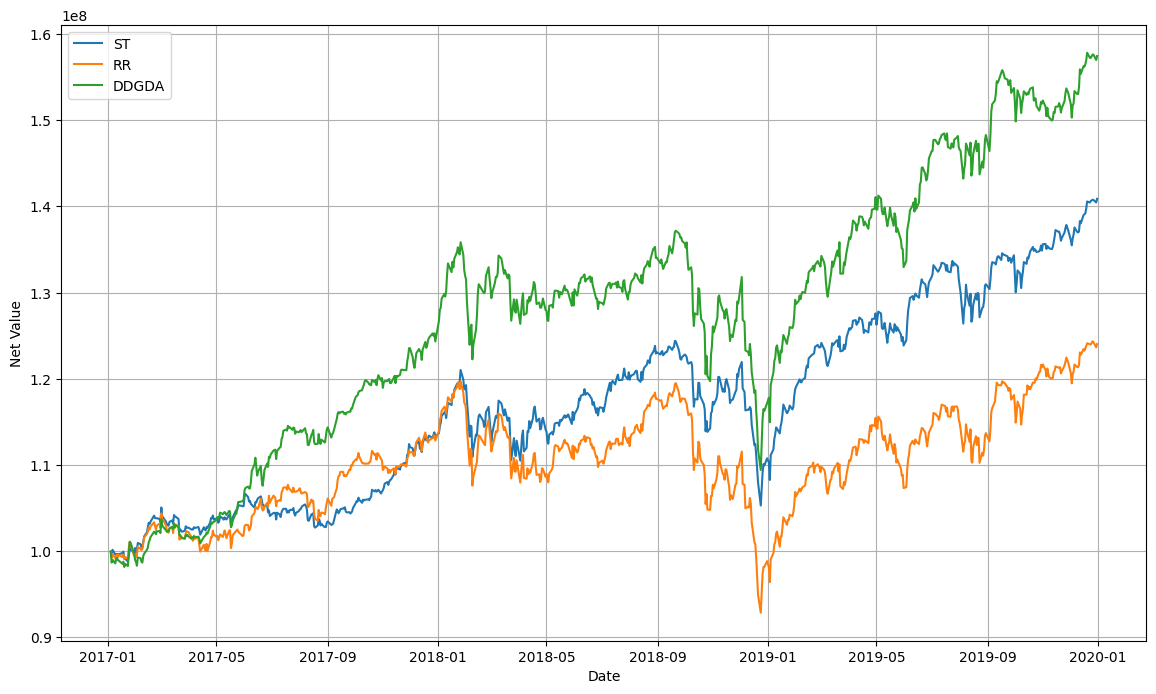

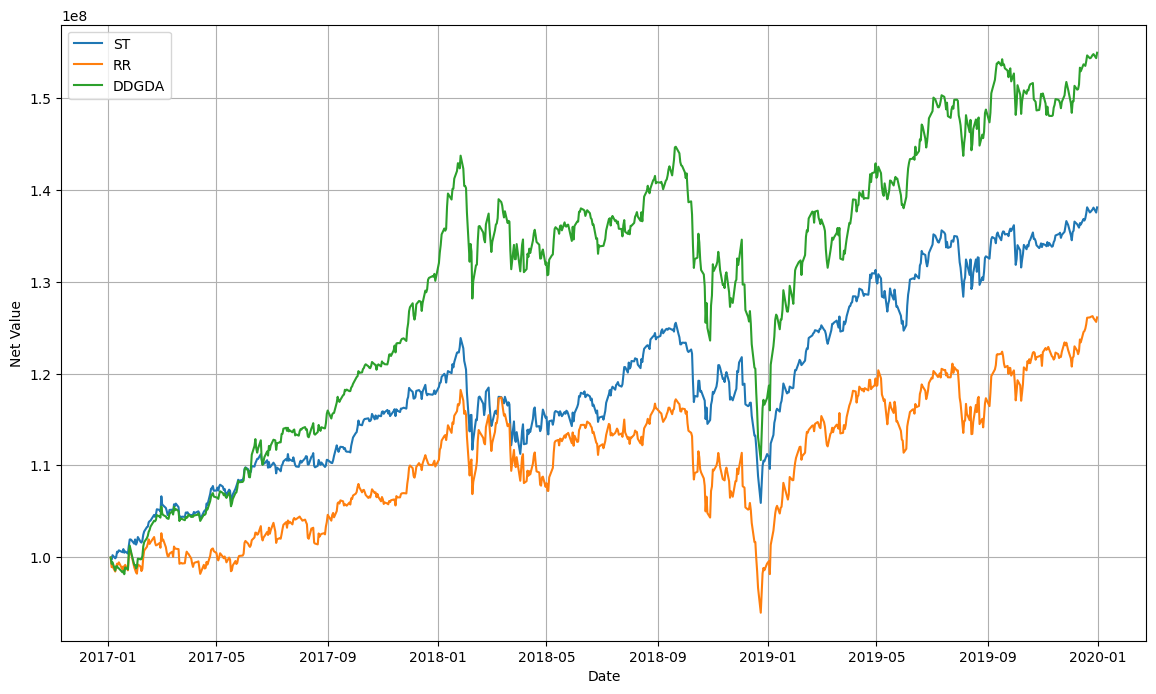

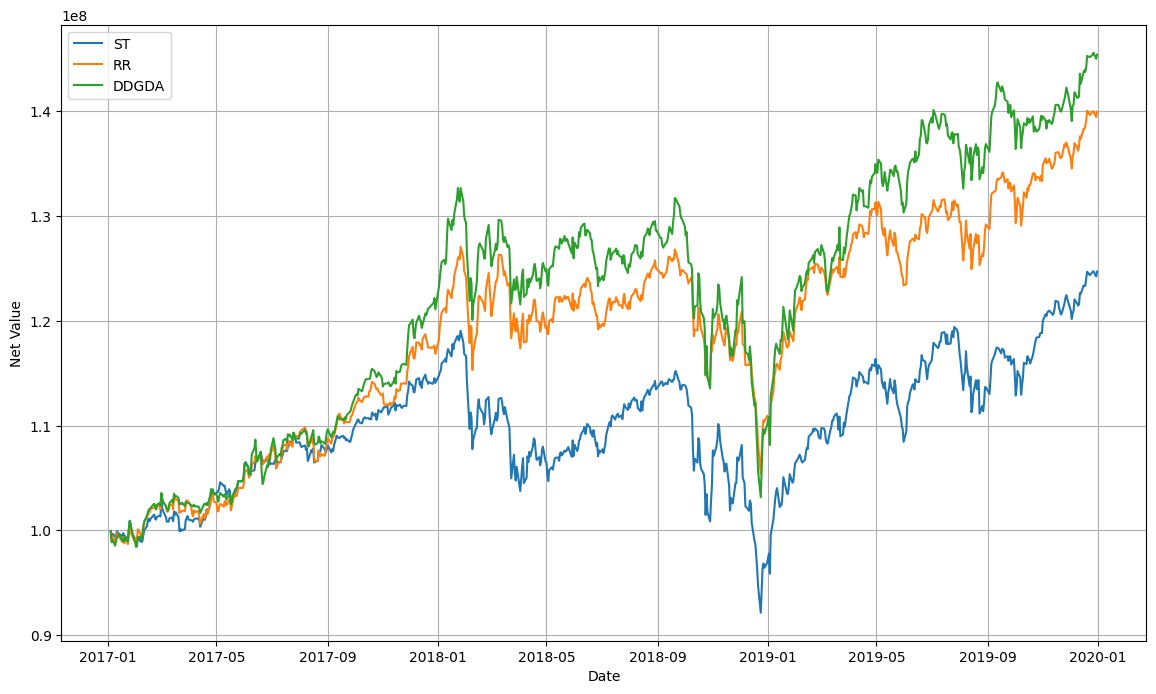

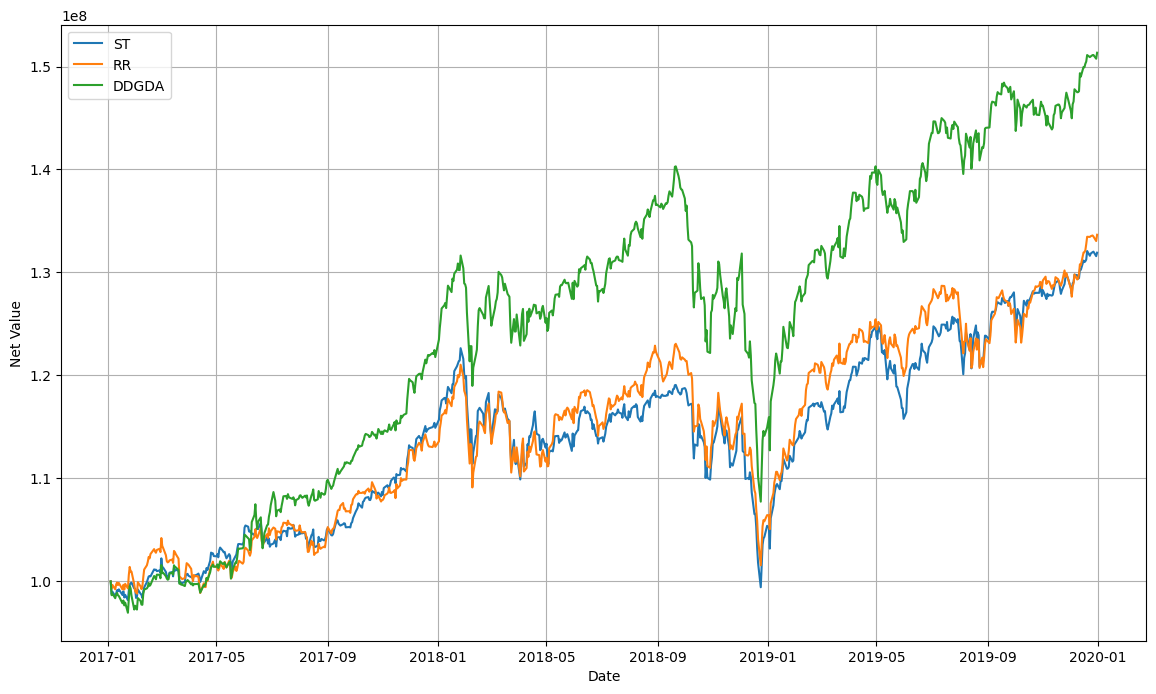

In [5]:
for md in MODEL_LIST:
    plt_models(model_dict[md], f'Net Values Over Time for Different Training Methods\nModel: {md}', f'./plots/{md}_comparison.png', show = False)

In [ ]:
plt_models(model_dict['LSTM'], f'Net Values Over Time for Different Training Methods\nModel: {LSTM}')

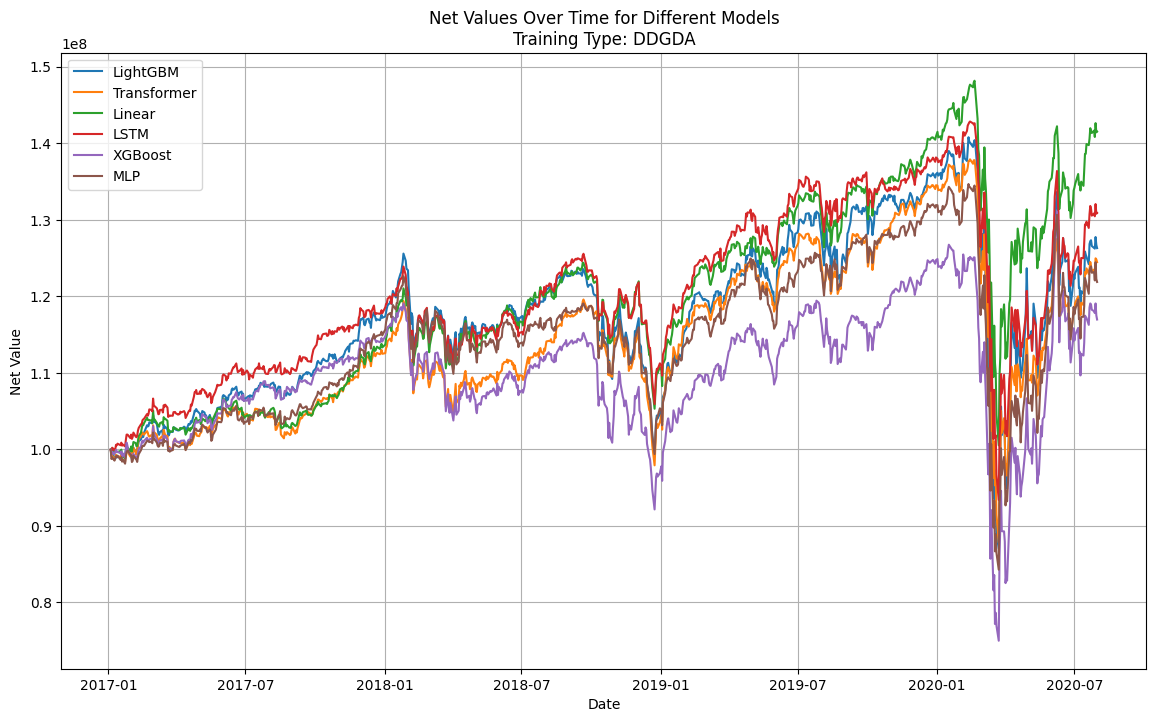

In [5]:
plt_models(perf_dict['ST'], 'ST')

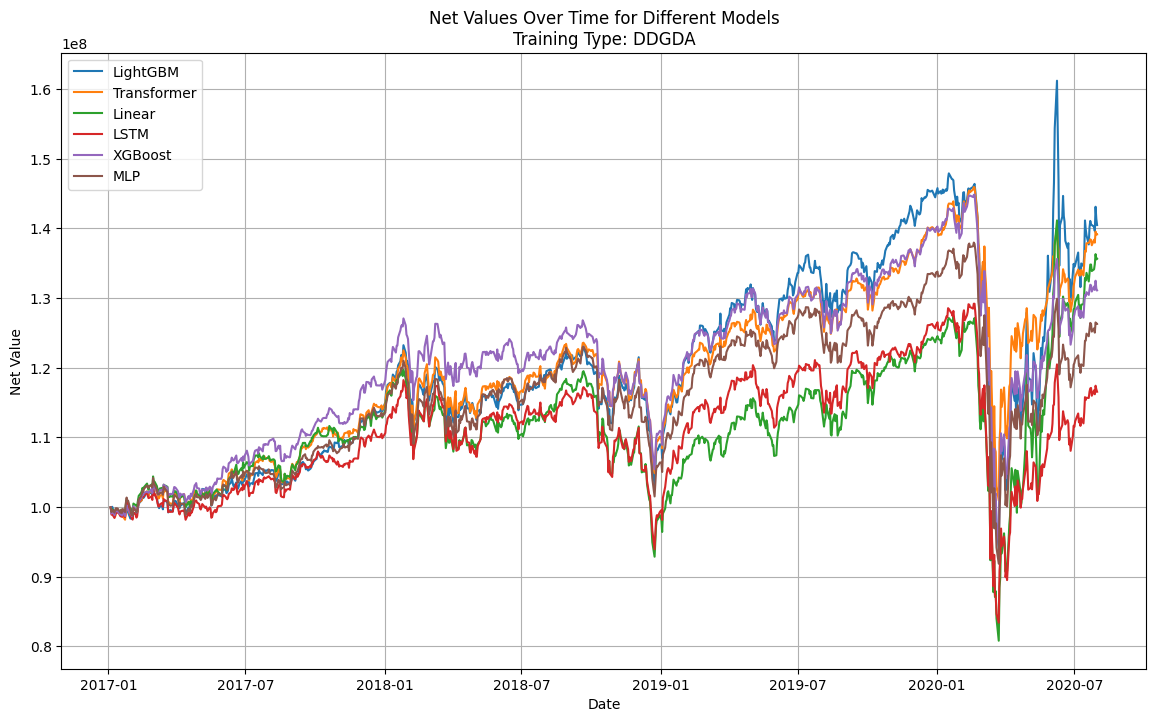

In [7]:
plt_models(perf_dict['RR'], 'RR')

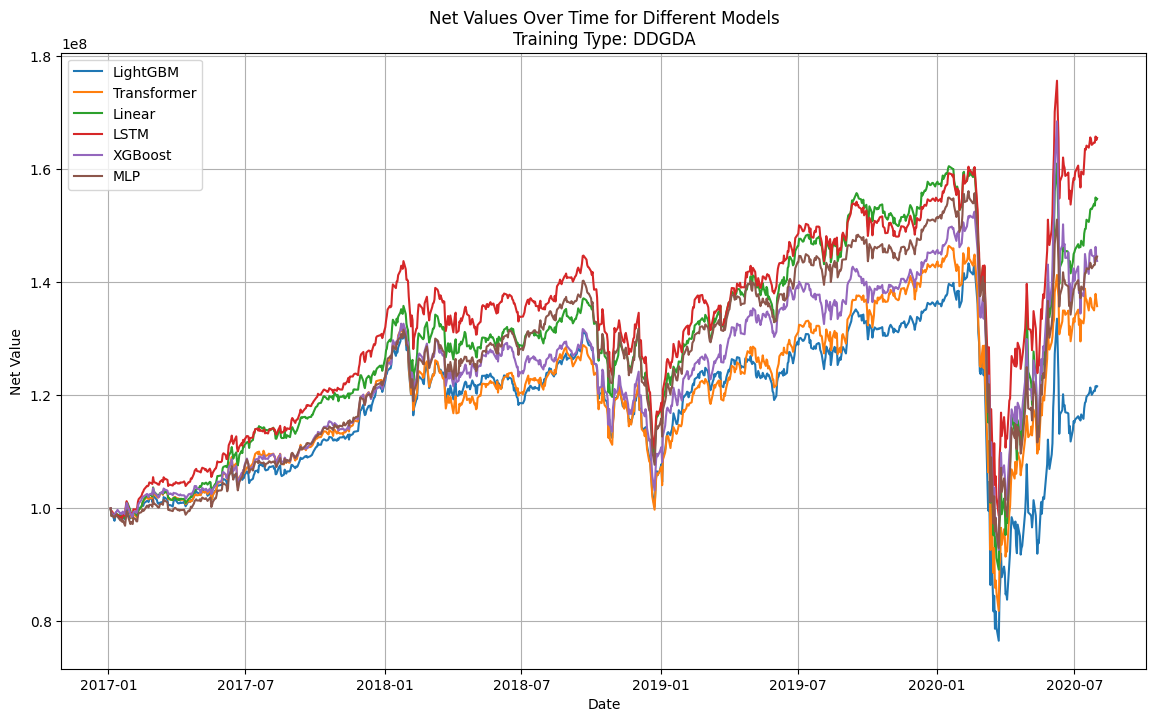

In [6]:
plt_models(perf_dict['DDGDA'], 'DDGDA')

In [ ]:
model_dict = {}

In [9]:
for md in MODEL_LIST:
    md_dict = {}
    for tt in TRAINING_TYPES:
        md_dict[tt] = perf_dict[tt][md]
        perf_
    print(md)

NameError: name 'MODELS' is not defined

In [8]:
# 需要找到一个模型的三条线

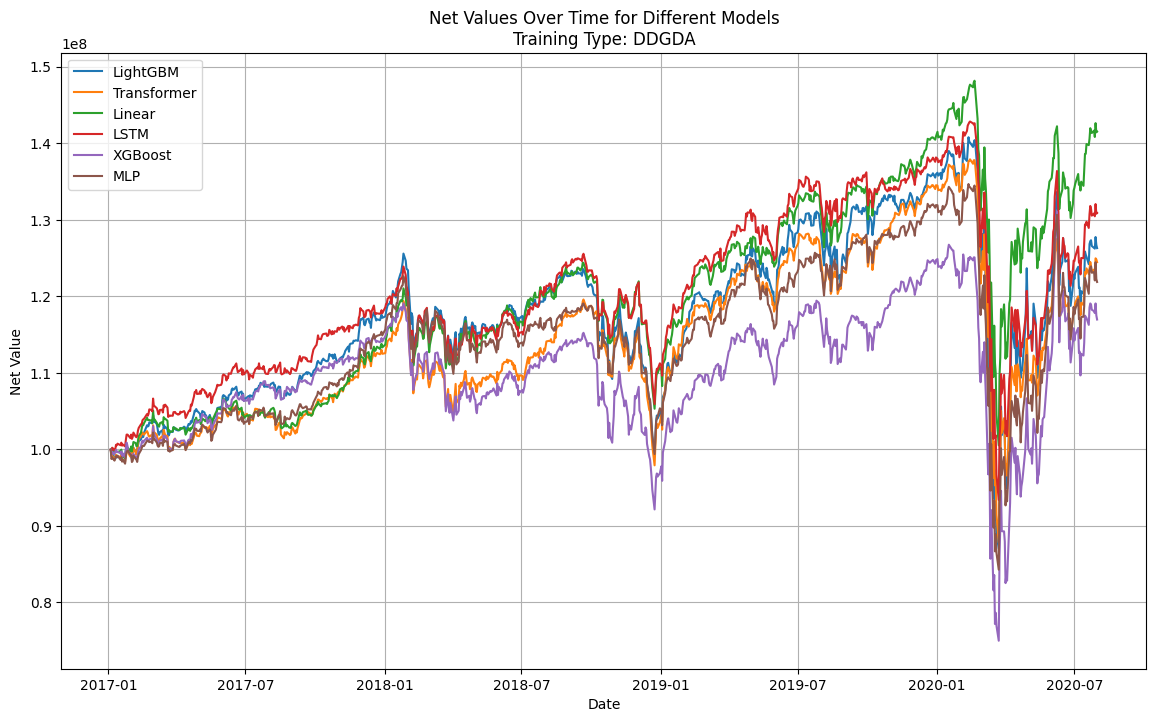

In [4]:

md = plt_models(perf_dict['ST'], 'ST')

In [ ]:
plt_models(perf_dict['ST'], 'ST')

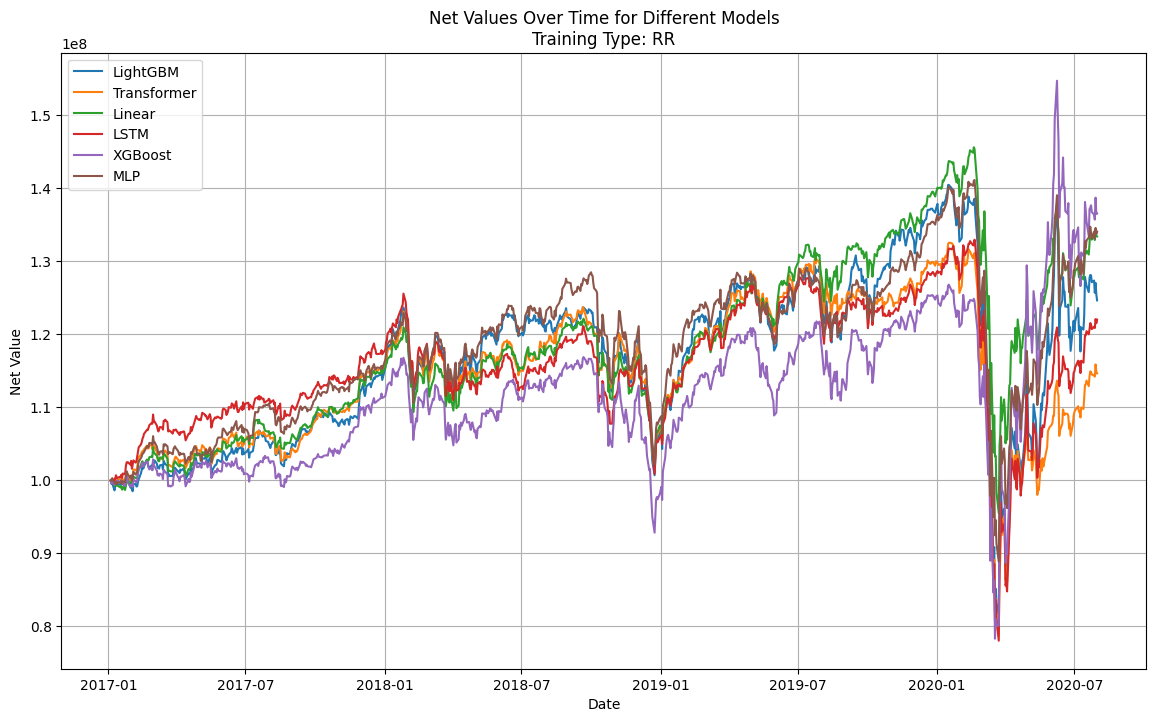

In [20]:
plt_models(ST_RES, 'ST')

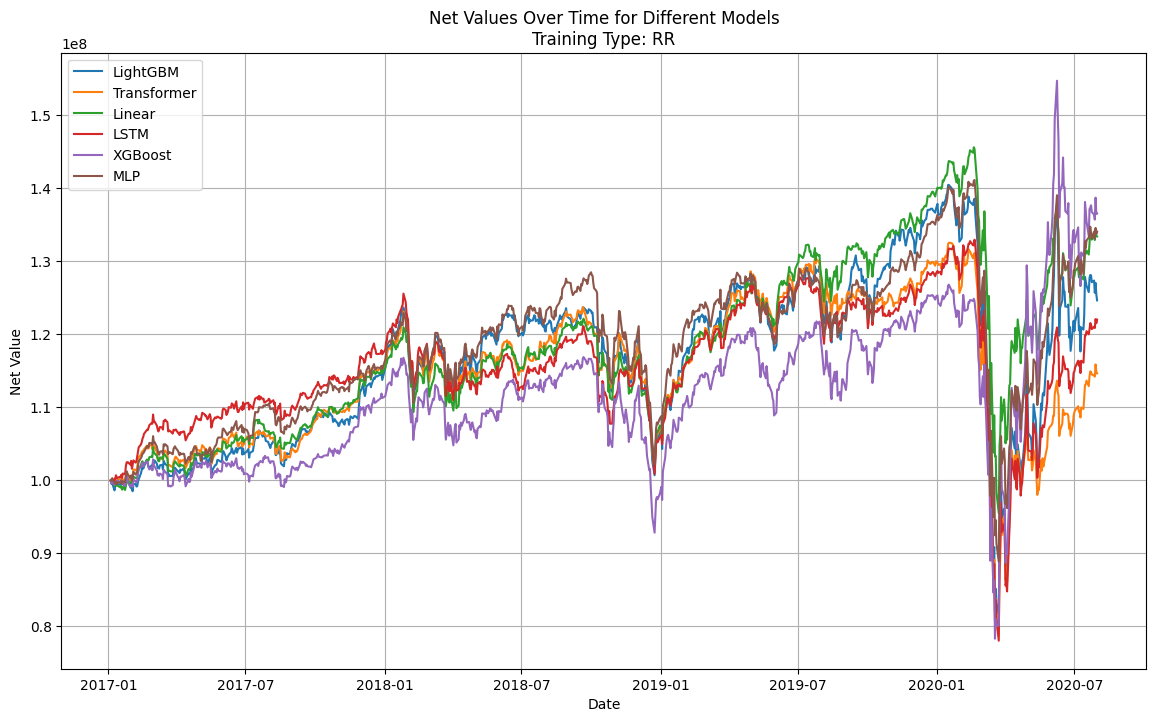

In [21]:
plt_models(RR_RES, 'RR')

In [14]:
# # 绘图
# plt.figure(figsize=(14, 8))

# for model, data in ST_RES.items():
#     plt.plot(data.index, data.values, label=model)

# plt.xlabel('Date')
# plt.ylabel('Net Value')
# plt.title(f'Net Values Over Time for Different Models\nTraining Type: {tt}')

# plt.legend()
# plt.grid(True)

# plt.savefig(f'./plots/account_values_{tt}.png')

# plt.show()

In [5]:
tt = 'RR'   # Traing type
RR_RES  = {}
# md = 'Transformer'
for md in MODEL_LIST:
    try:
        file_path = os.path.join(RESULT_PATH, tt, md, DIR_AFTERFIX, REPORT_FILE)
        perf_res = pd.read_pickle(file_path).iloc[1:]
        value_res = perf_res['account']
        RR_RES[md] = value_res
    except:
        print(md)
        continue

LSTM
XGBoost
MLP


In [8]:
def plt_models(data_dict, graph_name):
# 绘图

    plt.figure(figsize=(14, 8))

    for model, data in ST_RES.items():
        plt.plot(data.index, data.values, label=model)

    plt.xlabel('Date')
    plt.ylabel('Net Value')
    plt.title(f'Net Values Over Time for Different Models\nTraining Type: {tt}')

    plt.legend()
    plt.grid(True)

    plt.savefig(f'./plots/account_values_{tt}.png')

    plt.show()

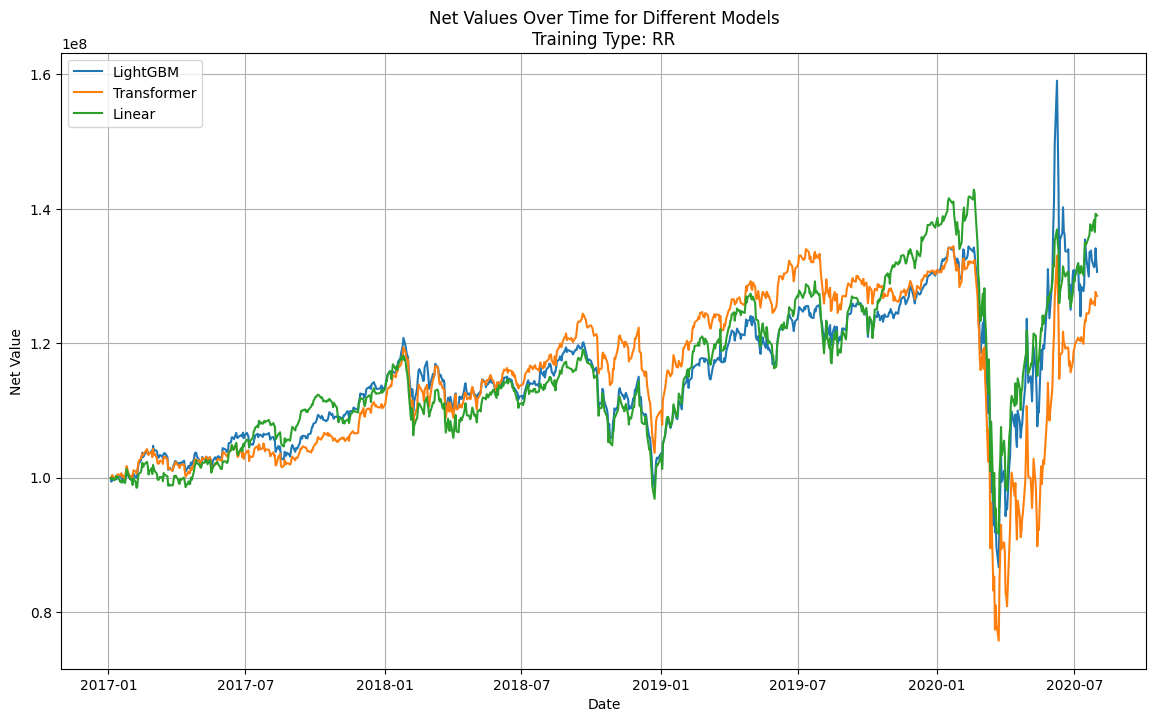

In [9]:
plt_models(RR_RES, f'RR')

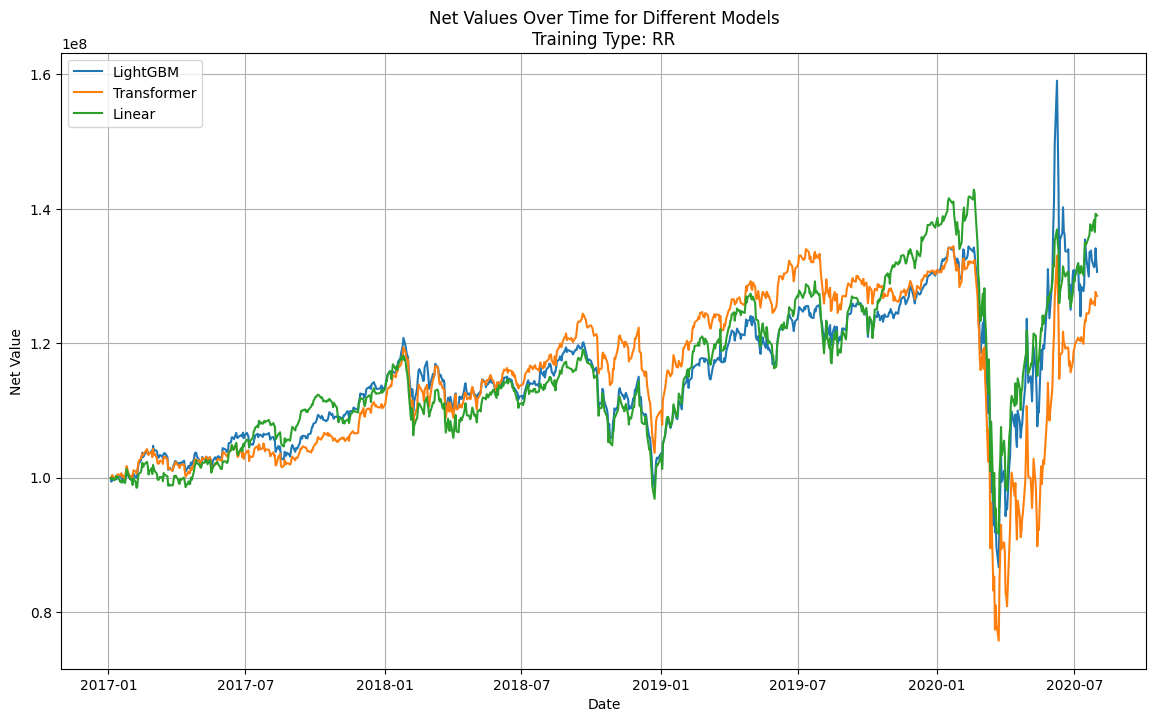

In [7]:
# 绘图

plt.figure(figsize=(14, 8))

for model, data in ST_RES.items():
    plt.plot(data.index, data.values, label=model)

plt.xlabel('Date')
plt.ylabel('Net Value')
plt.title(f'Net Values Over Time for Different Models\nTraining Type: {tt}')

plt.legend()
plt.grid(True)

plt.savefig(f'./plots/account_values_{tt}.png')

plt.show()

In [6]:
RR_RES

{'LightGBM': datetime
 2017-01-04    9.995250e+07
 2017-01-05    9.938406e+07
 2017-01-06    9.989416e+07
 2017-01-09    9.960841e+07
 2017-01-10    9.971151e+07
                   ...     
 2020-07-27    1.312904e+08
 2020-07-28    1.315191e+08
 2020-07-29    1.341122e+08
 2020-07-30    1.320338e+08
 2020-07-31    1.306009e+08
 Name: account, Length: 900, dtype: float64,
 'Transformer': datetime
 2017-01-04    9.995250e+07
 2017-01-05    1.000448e+08
 2017-01-06    1.003826e+08
 2017-01-09    9.973241e+07
 2017-01-10    9.983624e+07
                   ...     
 2020-07-27    1.262589e+08
 2020-07-28    1.256255e+08
 2020-07-29    1.276263e+08
 2020-07-30    1.271465e+08
 2020-07-31    1.270213e+08
 Name: account, Length: 900, dtype: float64,
 'Linear': datetime
 2017-01-04    9.995345e+07
 2017-01-05    9.971976e+07
 2017-01-06    9.995341e+07
 2017-01-09    9.962492e+07
 2017-01-10    9.986880e+07
                   ...     
 2020-07-27    1.383408e+08
 2020-07-28    1.365335e+08
 20

In [35]:
value_res

datetime
2017-01-04    9.995250e+07
2017-01-05    9.997723e+07
2017-01-06    1.001110e+08
2017-01-09    9.967207e+07
2017-01-10    9.951165e+07
                  ...     
2020-07-27    1.340218e+08
2020-07-28    1.330458e+08
2020-07-29    1.345160e+08
2020-07-30    1.337120e+08
2020-07-31    1.340302e+08
Name: account, Length: 900, dtype: float64

<Axes: xlabel='datetime'>

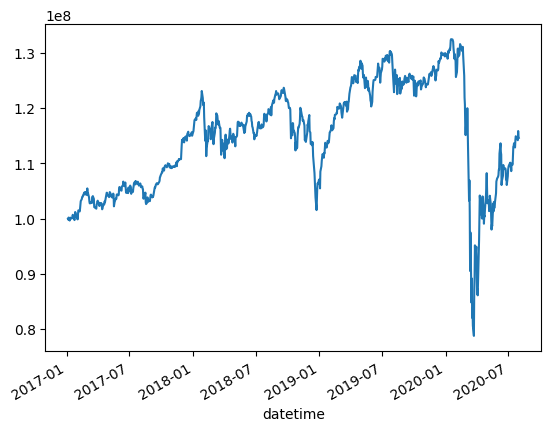

In [27]:
value_res.plot()

In [8]:
os.listdir(file_path)

['indicator_analysis_1day.pkl',
 'report_normal_1day.pkl',
 'indicators_normal_1day_obj.pkl',
 'indicators_normal_1day.pkl',
 'port_analysis_1day.pkl',
 'positions_normal_1day.pkl']

In [ ]:
# Function to load results for all models from a given path
def load_model_results(models, trainig_type, result_path):
    line_dict = {}
    for model in models:
        try:
            line_dict[model] = read_result(result_path, model)
        except Exception as e:
            print(f"Failed to load data for {model}: {e}")
    return pd.DataFrame(line_dict)

# Function to read result data for a specific model
def read_result(result_path, model_name):
    file_path = os.path.join(result_path, model_name.lower(), REPORT_FILE)
    try:
        model_result = pd.read_pickle(file_path)['value'].iloc[1:]  # Exclude the first day
    except Exception as e:
        print(f"Failed to load data for {model_name}: {e}")
        return None
    return model_result

# Function to plot results for multiple models
def plot_results(data_frame, models, training_type):
    fig = go.Figure()
    for model in models:
        fig.add_trace(go.Scatter(x=data_frame.index, y=data_frame[model], mode='lines', name=model))
    fig.update_layout(
        title=f'Value Over Time - Training Type: {training_type}',
        xaxis_title='Date',
        yaxis_title='Value',
        legend_title='Model'
    )
    fig.show()